In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
import os

In [2]:
path ="dataset-compliance.xlsx"   #获取相对路径
print(path)

dataset-compliance.xlsx


In [3]:
data = pd.read_excel(path, sheet_name=1)  #读入数据
print(data)

      GAP_between_Create_Last  TOTAL_EXPENSED_AMOUNT  APPROVED_AMT  \
0                          49                6652.68          59.5   
1                          49                6652.68          32.0   
2                           9               26360.32         111.5   
3                           0               14410.71          84.0   
4                           9                7294.69         290.0   
...                       ...                    ...           ...   
9995                        2               15461.07         286.0   
9996                        2               14691.73          64.5   
9997                        7                9183.70          30.0   
9998                        0                 380.00         380.0   
9999                       16                8363.70        2535.0   

      PAID_IN_AMOUNT_ALLOCATION  EXPENSE_TYPE_DESC  CITY  Label  
0                          59.5                  4     1      1  
1                          

In [4]:
x = data.iloc[:, :6] #取GAP_between_Create_Last到CITY的列数据作为x
y = data.iloc[:,6:7] #get the column data of Label
print(x)
print(y)

      GAP_between_Create_Last  TOTAL_EXPENSED_AMOUNT  APPROVED_AMT  \
0                          49                6652.68          59.5   
1                          49                6652.68          32.0   
2                           9               26360.32         111.5   
3                           0               14410.71          84.0   
4                           9                7294.69         290.0   
...                       ...                    ...           ...   
9995                        2               15461.07         286.0   
9996                        2               14691.73          64.5   
9997                        7                9183.70          30.0   
9998                        0                 380.00         380.0   
9999                       16                8363.70        2535.0   

      PAID_IN_AMOUNT_ALLOCATION  EXPENSE_TYPE_DESC  CITY  
0                          59.5                  4     1  
1                          32.0          

In [5]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state = 0) #测试数据和训练数据
print(x_train,y_train)

      GAP_between_Create_Last  TOTAL_EXPENSED_AMOUNT  APPROVED_AMT  \
7389                        5                 400.00         400.0   
9275                        0                5969.91          12.0   
2995                        1               22447.00        2564.0   
5316                       46                3537.23          30.0   
356                        19                8578.89         770.0   
...                       ...                    ...           ...   
9225                        4                9394.21          10.0   
4859                        1                5383.05         144.0   
3264                       16               14733.83         448.5   
9845                       28                6524.47        2879.0   
2732                        1                3102.74          18.0   

      PAID_IN_AMOUNT_ALLOCATION  EXPENSE_TYPE_DESC  CITY  
7389                      400.0                  1    22  
9275                       12.0          

In [6]:
clf = tree.DecisionTreeClassifier(criterion = "entropy",max_depth = 5,min_samples_leaf = 5)  #用信息熵划分决策树
clf.fit(x_train,y_train) #训练
y_test_hat = clf.predict(x_test)  #测试
y_test_pb = clf.predict_proba(x_test)  #算取得测试值的概率
print(y_test_hat)
print(y_test_pb)

[0 0 0 ... 0 0 0]
[[0.61056106 0.38943894]
 [0.76595745 0.23404255]
 [0.60992908 0.39007092]
 ...
 [0.76595745 0.23404255]
 [0.82953386 0.17046614]
 [0.61056106 0.38943894]]


In [7]:
np.set_printoptions(precision = 2)   #设置精度为保留两位小数
importances = clf.feature_importances_  #返回每个数据集的重要性
print("the importance of the features:",importances)

the importance of the features: [0.1  0.19 0.06 0.04 0.02 0.6 ]


In [8]:
print(classification_report(y_test, y_test_hat)) #生成混淆矩阵的相关指标

              precision    recall  f1-score   support

           0       0.78      0.96      0.86      1524
           1       0.53      0.13      0.20       476

    accuracy                           0.77      2000
   macro avg       0.65      0.55      0.53      2000
weighted avg       0.72      0.77      0.71      2000



[0.00e+00 6.56e-04 2.89e-02 3.54e-02 4.40e-02 4.46e-02 8.14e-02 1.13e-01
 1.81e-01 1.84e-01 2.40e-01 2.45e-01 3.68e-01 4.48e-01 4.70e-01 4.93e-01
 9.06e-01 9.09e-01 9.16e-01 9.30e-01 1.00e+00] [0.   0.   0.11 0.13 0.18 0.18 0.24 0.32 0.42 0.42 0.48 0.49 0.6  0.68
 0.71 0.72 0.99 0.99 0.99 0.99 1.  ]


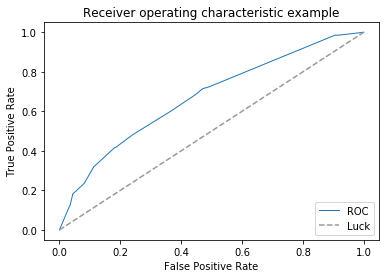

In [9]:
#画ROC曲线
fpr, tpr, thresholds = roc_curve(y_test, y_test_pb[:, 1])  #计算fpr，tpr
print(fpr,tpr)
roc_auc = auc(fpr,tpr)  #计算auc面积
plt.plot(fpr,tpr,lw = 1,label = 'ROC')
plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')  #对角线
plt.xlim([-0.05, 1.05])     # 设置x、y轴的上下限
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [10]:
cnf_matrix = confusion_matrix(y_test,y_test_hat)  #计算混淆矩阵
print(cnf_matrix)

[[1470   54]
 [ 416   60]]


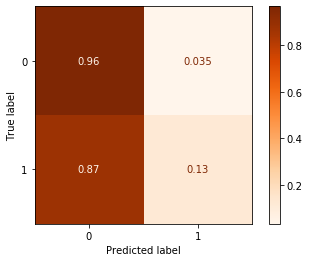

In [11]:
#绘制混淆矩阵
class_names = ['0','1']
plot_confusion_matrix(clf,x_test,y_test,display_labels = class_names,cmap = plt.cm.Oranges,normalize = "true")

In [12]:
#评估交叉验证的得分
x = data.iloc[:, :6]
scores1 = cross_val_score(clf,x,y,cv = 5,scoring = 'accuracy')
scores2 = cross_val_score(clf,x,y,cv = 5,scoring = 'roc_auc')
scores3 = cross_val_score(clf,x,y,cv = 5,scoring = 'f1_macro')
print(scores1,'\n',scores2,'\n',scores3)

[0.76 0.76 0.77 0.72 0.75] 
 [0.63 0.64 0.72 0.59 0.65] 
 [0.56 0.55 0.57 0.52 0.54]


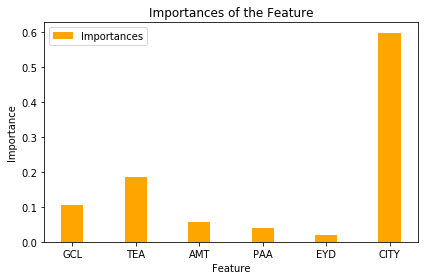

In [13]:

#绘制重要性的直方图

labels = ['GCL', 'TEA', 'AMT', 'PAA', 'EYD','CITY']
I = importances
#women_means = [25, 32, 34, 20, 25,50]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x , I, width,color = 'orange',label='Importances')
#rects2 = ax.bar(x + width/2, women_means, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Importance')
ax.set_xlabel('Feature')
ax.set_title('Importances of the Feature')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

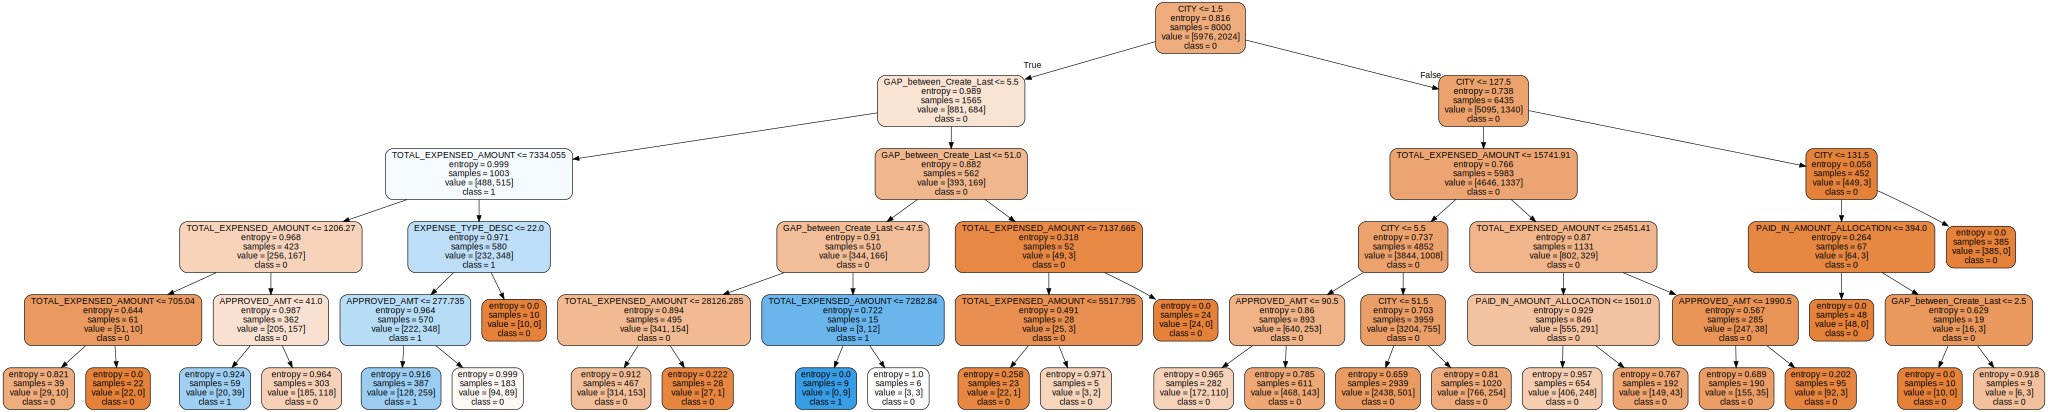

In [14]:
#绘制决策树
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
feature_name = ['GAP_between_Create_Last','TOTAL_EXPENSED_AMOUNT',
                     'APPROVED_AMT','PAID_IN_AMOUNT_ALLOCATION','EXPENSE_TYPE_DESC','CITY']

clf = DecisionTreeClassifier(criterion = "entropy",max_depth = 5,min_samples_leaf = 5)
clf.fit(x_train,y_train)

dot_data = export_graphviz(clf,feature_names = feature_name,class_names = ['0','1'],filled = True,rounded = True)
graph = graphviz.Source(dot_data)
graph